In [115]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')

#Se cargan y observan los datos
data_frame = pd.read_csv("weatherAUS.csv")
data_frame

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [116]:
data_frame.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [117]:
data_frame.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [118]:
print(data_frame.groupby('RainTomorrow').size())

RainTomorrow
No     110316
Yes     31877
dtype: int64


In [119]:
for feature in data_frame.columns:
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de val

In [120]:
## Tratamiento de datos nulos float64

# MinTemp = Mean
data_frame["MinTemp"] = data_frame["MinTemp"].fillna(12.186400)

# MaxTemp = Mean
data_frame["MaxTemp"] = data_frame["MaxTemp"].fillna(23.226784)

# Rainfall = Min
data_frame["Rainfall"] = data_frame["Rainfall"].fillna(0)

# Evaporation = Mean
data_frame["Evaporation"] = data_frame["Evaporation"].fillna(5.469824)

# Sunshine = Mean
data_frame["Sunshine"] = data_frame["Sunshine"].fillna(7.624853)

# WindGustSpeed = Mean
data_frame["WindGustSpeed"] = data_frame["WindGustSpeed"].fillna(39.984292)

# WindSpeed9am = Mean
data_frame["WindSpeed9am"] = data_frame["WindSpeed9am"].fillna(14.001988)

# WindSpeed3pm = Mean
data_frame["WindSpeed3pm"] = data_frame["WindSpeed3pm"].fillna(18.637576)

# Humidity9am = Mean
data_frame["Humidity9am"] = data_frame["Humidity9am"].fillna(68.843810)

# Humidity3pm = Mean
data_frame["Humidity3pm"] = data_frame["Humidity3pm"].fillna(51.482606)

# Pressure9am = Mean
data_frame["Pressure9am"] = data_frame["Pressure9am"].fillna(1017.653758)

# Pressure3pm = Mean
data_frame["Pressure3pm"] = data_frame["Pressure3pm"].fillna(1015.258204)

# Cloud9am = Mean
data_frame["Cloud9am"] = data_frame["Cloud9am"].fillna(4.437189)

# Cloud3pm = Mean
data_frame["Cloud3pm"] = data_frame["Cloud3pm"].fillna(4.503167)

# Temp9am = Mean
data_frame["Temp9am"] = data_frame["Temp9am"].fillna(16.987509)

# Temp3pm = Mean
data_frame["Temp3pm"] = data_frame["Temp3pm"].fillna(21.687235)

## Tratamiento de datos nulos object

# RainToday = No
data_frame["RainToday"] = data_frame["RainToday"].fillna('No')

In [121]:
data_frame["RainTomorrow"] = data_frame["RainTomorrow"].replace("No",0)
data_frame["RainTomorrow"] = data_frame["RainTomorrow"].replace("Yes",1)

data_frame["RainToday"] = data_frame["RainToday"].replace("No",0)
data_frame["RainToday"] = data_frame["RainToday"].replace("Yes",1)

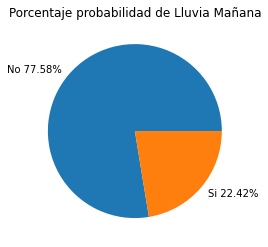

In [122]:
clases = np.array([data_frame[data_frame.RainTomorrow == 0].shape[0], data_frame[data_frame.RainTomorrow == 1].shape[0]])
labels = [str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]

labels[0] = 'No ' + labels[0]
labels[1] = 'Si ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje probabilidad de Lluvia Mañana')
plt.show()

In [123]:
data_frame = data_frame.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm'], axis=1)

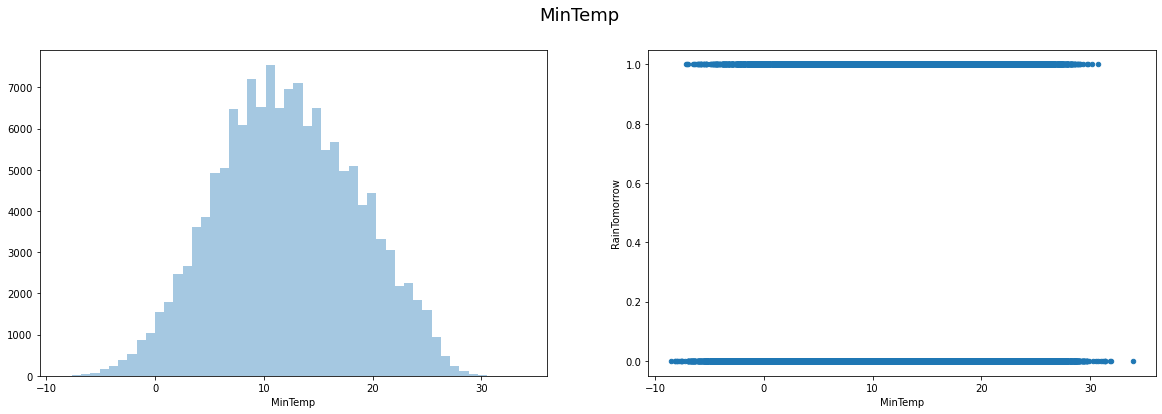

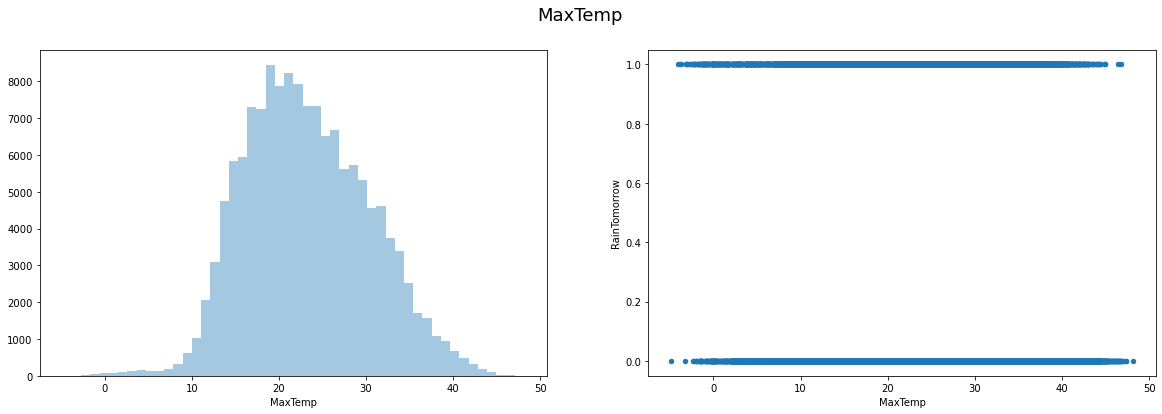

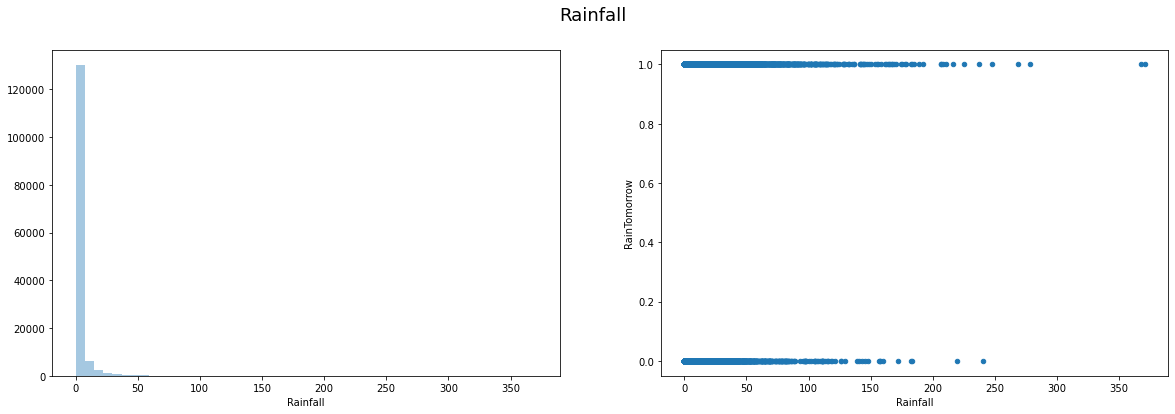

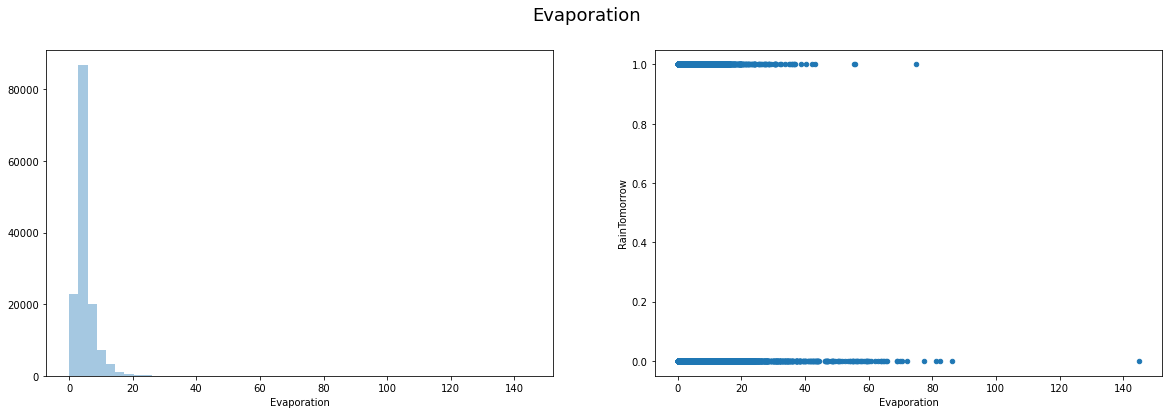

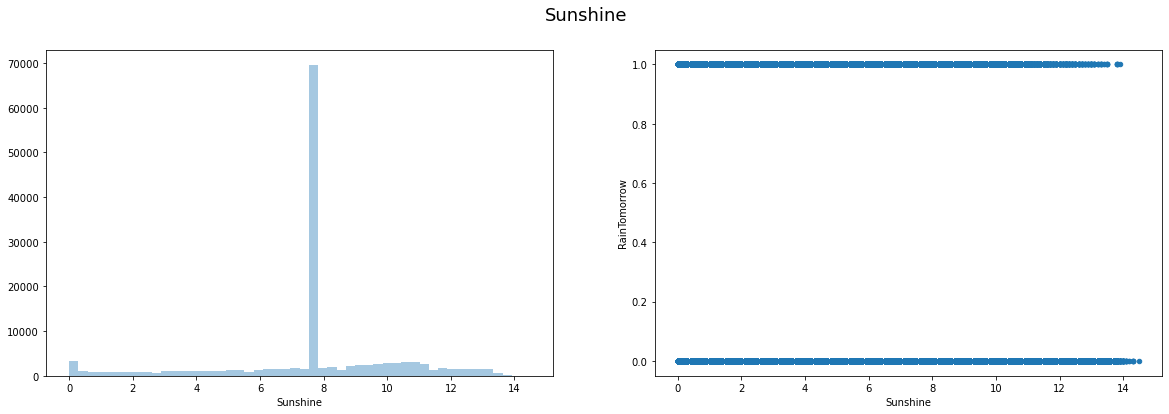

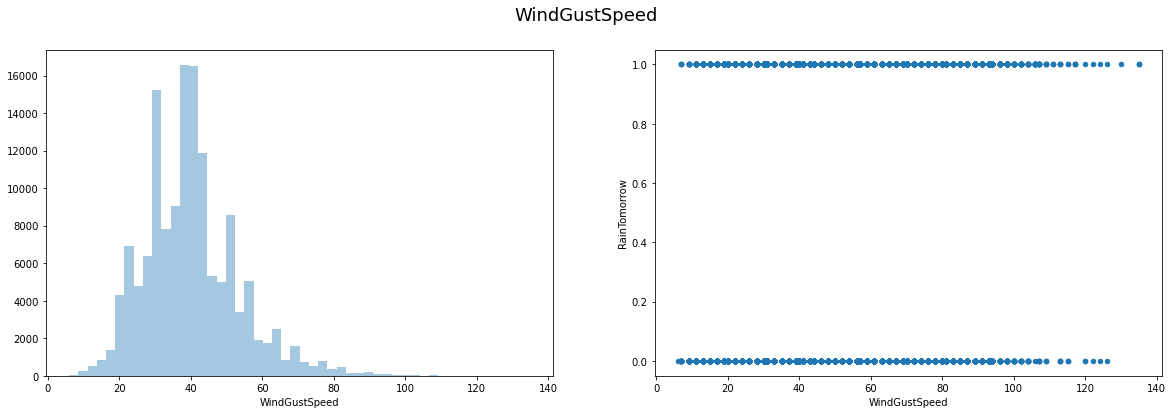

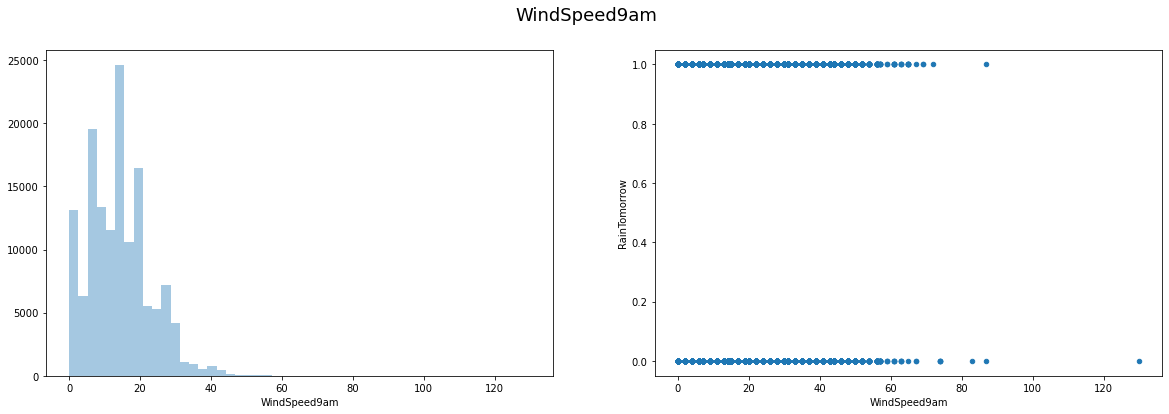

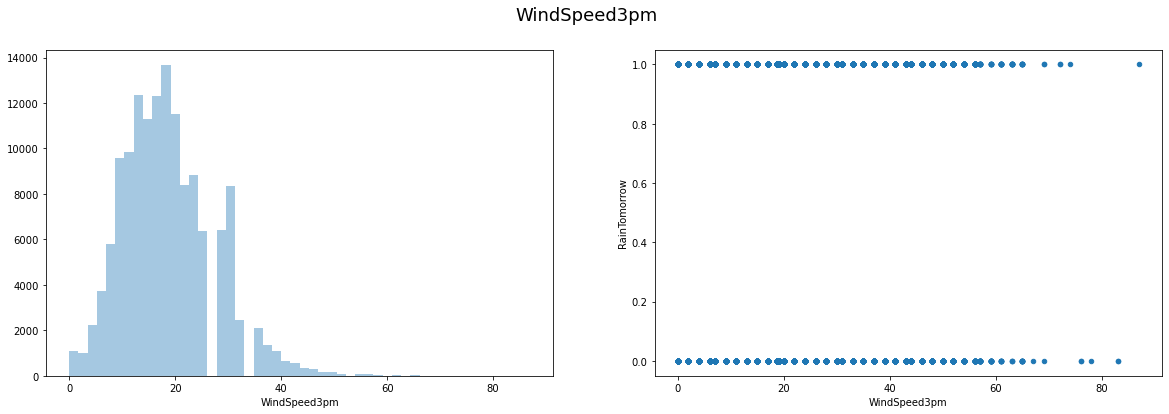

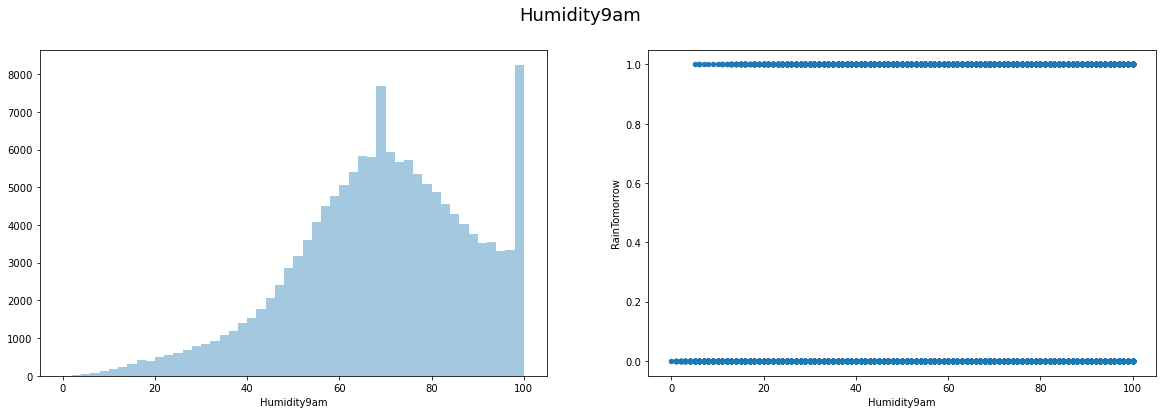

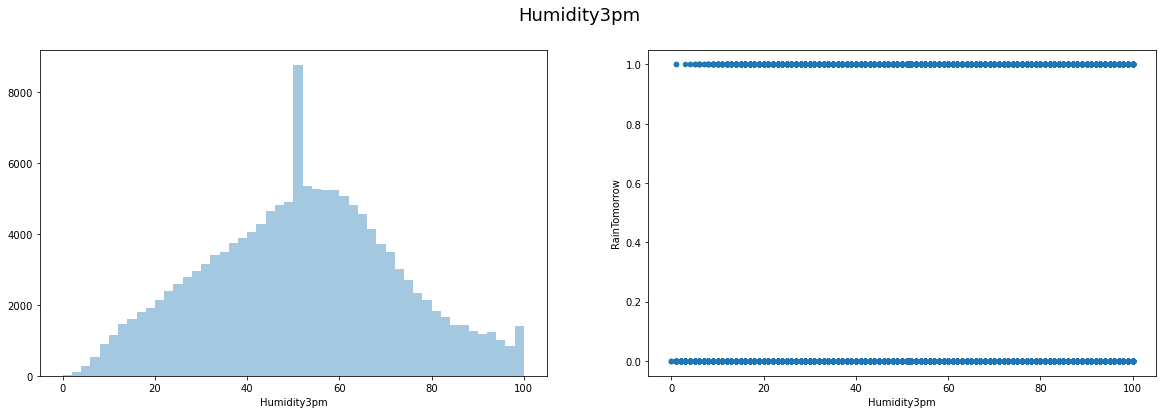

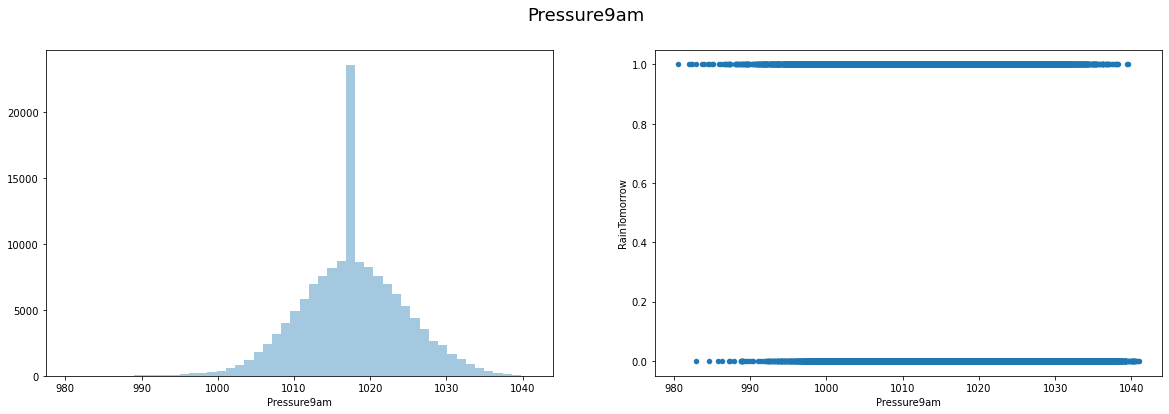

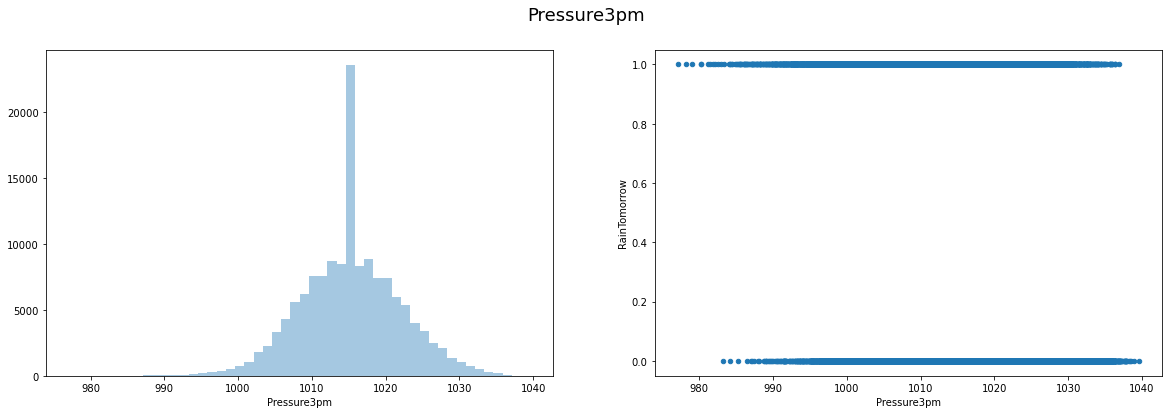

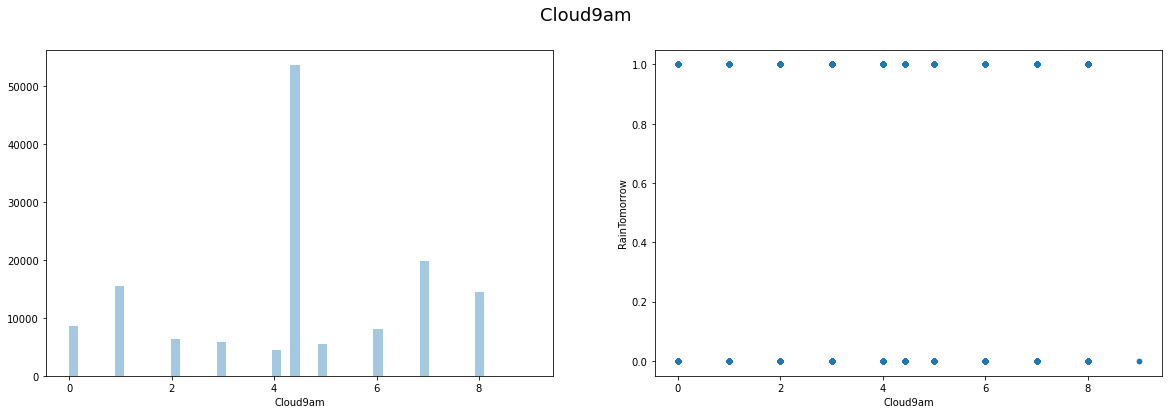

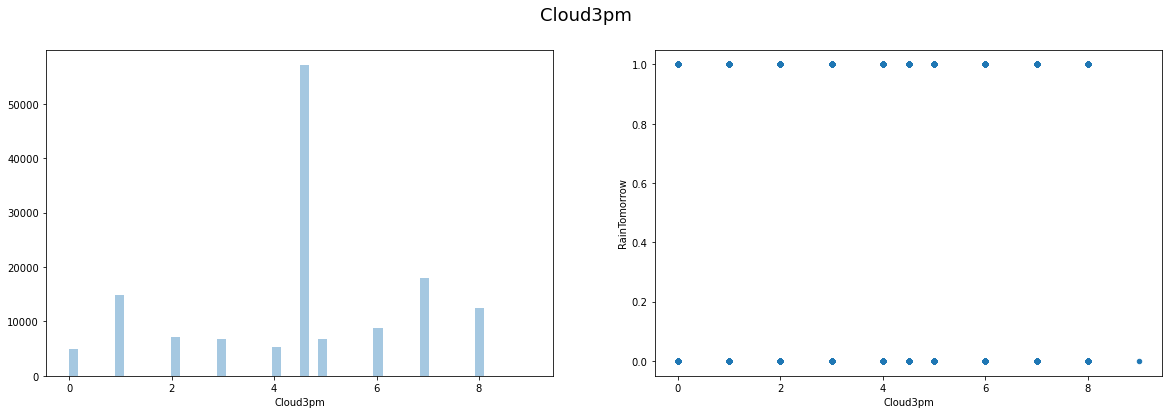

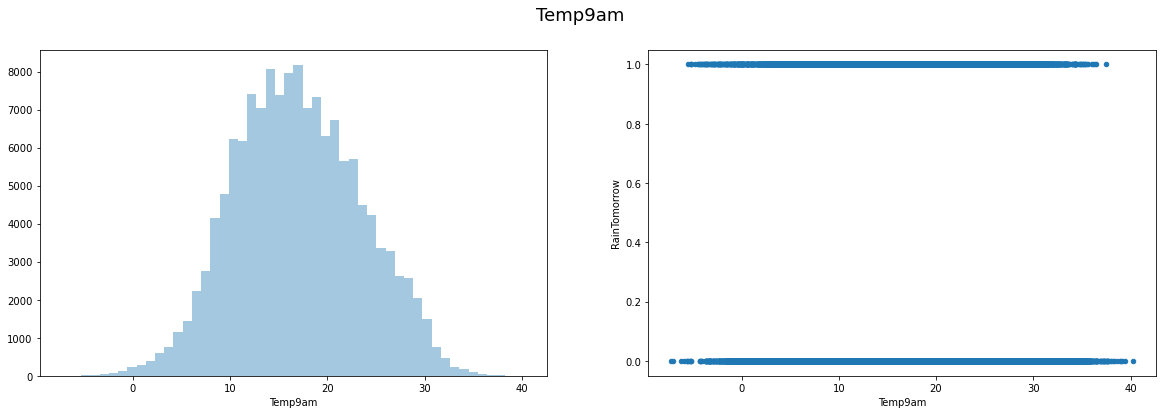

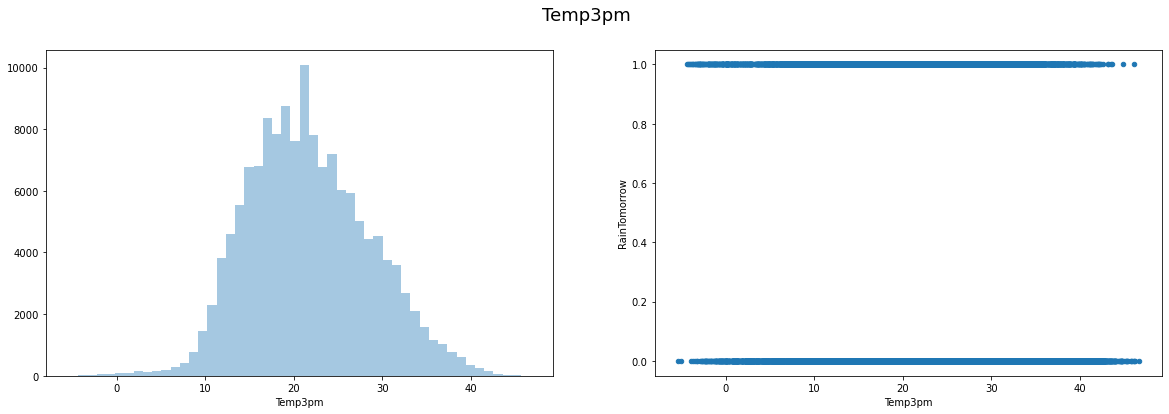

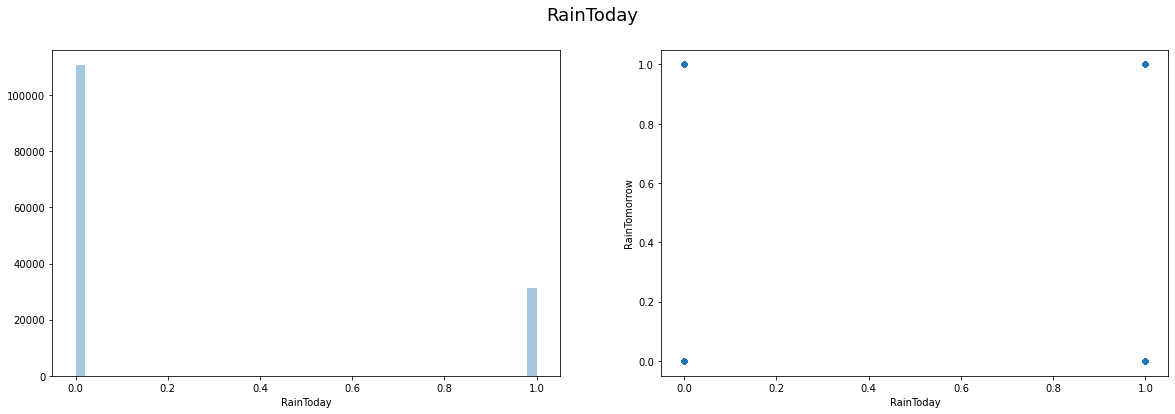

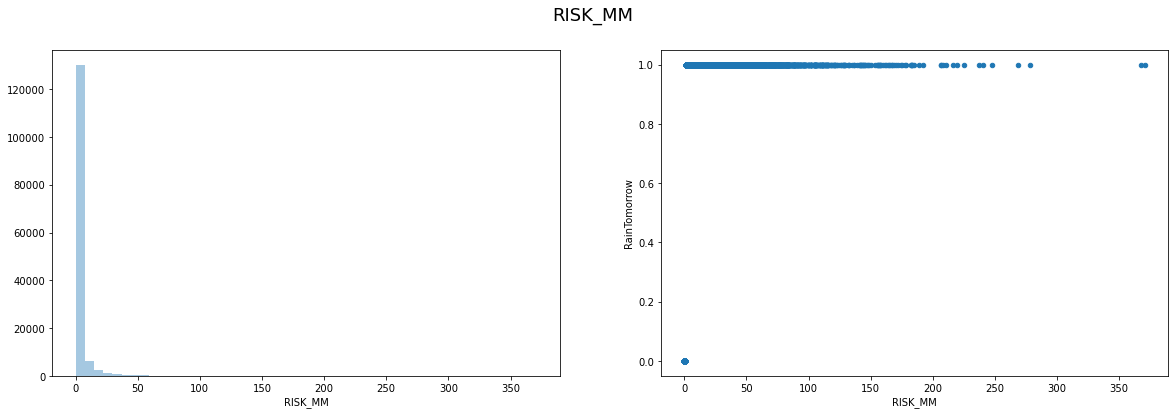

In [124]:
columnas = np.array(data_frame.columns)

for col in columnas[:-1]:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(data_frame[col], ax=ax[0], kde=False)
    data_frame[[col]+['RainTomorrow']].plot.scatter(x=col, y='RainTomorrow', ax=ax[1])
    plt.show()

In [125]:
X = data_frame.drop('RainTomorrow', axis=1)
y = data_frame['RainTomorrow']

In [126]:
from sklearn.naive_bayes import GaussianNB

#Se definen las variables de train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 20)

#Se utiliza el modelo y se muestra la precisión
modelo = GaussianNB()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
print('Precisión del modelo:',modelo.score(X_train,y_train))

Precisión del modelo: 0.9522178128296579


<AxesSubplot:title={'center':'Matriz de confusion'}>

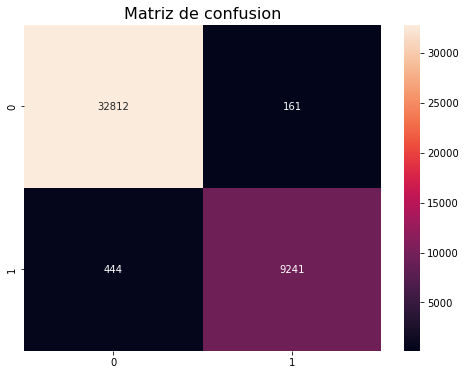

In [127]:
#Se importa la regresión logistica
from sklearn.linear_model import LogisticRegression
#Importamos las librerias para realizar las evaluaciones
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score

#Se definen las variables a utilizar
lr = LogisticRegression(random_state=29)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
accuracy = round(accuracy_score(y_test,preds)*100,2)

#Se muestra la matriz de confusión para el modelo
cm = confusion_matrix(y_test,preds)
plt.figure(figsize=(8,6))
plt.title('Matriz de confusion', size=16)
sns.heatmap(cm, annot=True, fmt='g')

In [134]:
#Se importa la libreria metrics que permite ver las diferentes medidas de los modelos
from sklearn import metrics

#Se define la variable que se utilizará para obtener la métrica
y_pred_prob = lr.predict_proba(X_test)[::,1]

#Se realiza el cálculo de AUC
auc = metrics.roc_auc_score(y_test,y_pred_prob)

print('AUC:',auc)
print('Recall: ',recall_score(y_test,preds))

AUC: 0.9991920173857927


ValueError: Classification metrics can't handle a mix of binary and continuous targets